In [2]:
import sqlite3 as sql
import pandas as pd

In [2]:
#dir(sql)

In [4]:
#connection
conn = sql.connect('database.sqlite')
conn

In [5]:
a = conn.execute('select * from Salaries')
a

In [4]:
pd.read_sql_query('select * from sqlite_master',conn)

,type,name,tbl_name,rootpage,sql
0,table,Salaries,Salaries,2,CREATE TABLE Salaries (\n Id INTEGER PRIMAR...
1,index,salaries_year_idx,Salaries,16566,CREATE INDEX salaries_year_idx ON Salaries (Year)


In [6]:
pd.read_sql_query('select * from Salaries',conn)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0,400184.25,,567595.43,567595.43,2011,,San Francisco,
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,,538909.28,538909.28,2011,,San Francisco,
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,,335279.91,335279.91,2011,,San Francisco,
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.71,198306.9,,332343.61,332343.61,2011,,San Francisco,
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737,182234.59,,326373.19,326373.19,2011,,San Francisco,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148649,148650,Roy I Tillery,Custodian,0,0,0,0,0.00,0.00,2014,,San Francisco,PT
148650,148651,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,
148651,148652,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,
148652,148653,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,


In [7]:
#1 Top 10 highest paid employees (by TotalPayBenefits)

pd.read_sql_query("""
    SELECT EmployeeName, TotalPayBenefits
    FROM Salaries
    ORDER BY TotalPayBenefits DESC
    LIMIT 10
""", conn)

,EmployeeName,TotalPayBenefits
0,NATHANIEL FORD,567595.43
1,GARY JIMENEZ,538909.28
2,David Shinn,510732.68
3,Amy P Hart,479652.21
4,William J Coaker Jr.,436224.36
5,Gregory P Suhr,425815.28
6,Joanne M Hayes-White,422353.40
7,Gregory P Suhr,418019.22
8,Joanne M Hayes-White,417435.10
9,Ellen G Moffatt,415767.94


In [8]:
#2 Find which year has missing data of Employees with 'Not Provided'/ 'Not provided' 

In [9]:
pd.read_sql_query("""
    SELECT DISTINCT Year
    FROM Salaries
    WHERE EmployeeName = 'Not Provided' OR EmployeeName = 'Not provided'
""", conn)

,Year
0,2011
1,2012
2,2014


In [10]:
#3 Number of unique agencies

In [11]:
pd.read_sql_query("""
    SELECT COUNT(DISTINCT Agency) AS UniqueAgencies
    FROM Salaries
""", conn)

,UniqueAgencies
0,1


In [12]:
#4 Show Average BasePay, OvertimePay, and TotalPay for year 2011

In [13]:
pd.read_sql_query("""
    SELECT 
        AVG(BasePay) AS AvgBasePay,
        AVG(OvertimePay) AS AvgOvertimePay,
        AVG(TotalPay) AS AvgTotalPay
    FROM Salaries
    WHERE Year = 2011
""", conn)

,AvgBasePay,AvgOvertimePay,AvgTotalPay
0,63595.956517,4531.065429,71744.103871


In [14]:
#5 Plot the top 10 job titles with the highest TotalPay in 2014

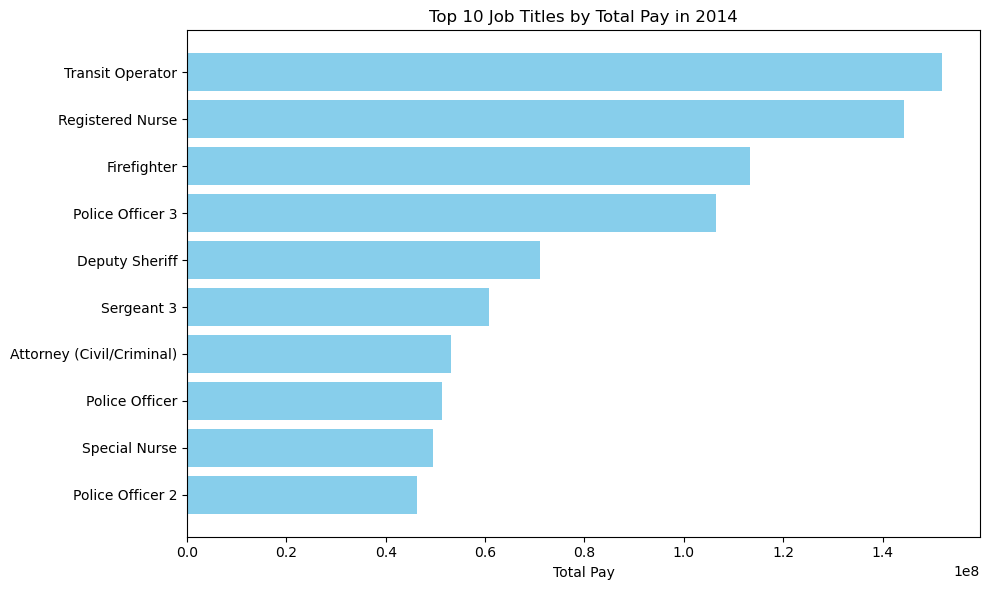

In [15]:
query = """
    SELECT JobTitle, SUM(TotalPay) AS TotalPaySum
    FROM Salaries
    WHERE Year = 2014
    GROUP BY JobTitle
    ORDER BY TotalPaySum DESC
    LIMIT 10
"""
top_jobs_2014 = pd.read_sql_query(query, conn)

import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.barh(top_jobs_2014['JobTitle'][::-1], top_jobs_2014['TotalPaySum'][::-1], color='skyblue')
plt.xlabel('Total Pay')
plt.title('Top 10 Job Titles by Total Pay in 2014')
plt.tight_layout()
plt.show()

In [16]:
#6 Which job titles have overtime pay exceeding $150,000 exluding 'Not provided'

In [17]:
pd.read_sql_query("""
    SELECT DISTINCT Jobtitle
    FROM Salaries
    WHERE OvertimePay > 150000
      AND Jobtitle != 'Not provided'
""", conn)

,JobTitle
0,CAPTAIN III (POLICE DEPARTMENT)
1,"Lieutenant, Fire Suppression"
2,EMT/Paramedic/Firefighter
3,Firefighter
4,Deputy Sheriff


In [18]:
#7 Find all employees whose job titles contain the word “CHIEF”

In [19]:
pd.read_sql_query("""
    SELECT EmployeeName, Jobtitle
    FROM Salaries
    WHERE UPPER(Jobtitle) LIKE '%CHIEF%'
""", conn)

,EmployeeName,JobTitle
0,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)"
1,DAVID SULLIVAN,ASSISTANT DEPUTY CHIEF II
2,ALSON LEE,"BATTALION CHIEF, (FIRE DEPARTMENT)"
3,MICHAEL MORRIS,"BATTALION CHIEF, (FIRE DEPARTMENT)"
4,JOANNE HAYES-WHITE,"CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)"
...,...,...
622,Sharon C Jackson,Chief Deputy Adlt Probation Of
623,Anita S Lee,Chief Clerk
624,George D Vaughan,Chief Nursery Specialist
625,Patrick W Gillespie,Chief Preparator


In [20]:
#8 Count how many employees have job titles containing “ENGINEER” and “Fire” in year 2012 and 2013

In [21]:
pd.read_sql_query("""
    SELECT 
        SUM(CASE WHEN UPPER(Jobtitle) LIKE '%ENGINEER%' THEN 1 ELSE 0 END) AS EngineerCount,
        SUM(CASE WHEN UPPER(Jobtitle) LIKE '%FIRE%' THEN 1 ELSE 0 END) AS FireCount
    FROM Salaries
    WHERE Year IN (2012, 2013)
""", conn)

,EngineerCount,FireCount
0,2076,2909


In [22]:
#9 Distinct job titles starting with "CAPTAIN"

In [23]:
pd.read_sql_query("""
    SELECT DISTINCT Jobtitle
    FROM Salaries
    WHERE UPPER(Jobtitle) LIKE 'CAPTAIN%'
""", conn)

,JobTitle
0,CAPTAIN III (POLICE DEPARTMENT)
1,"CAPTAIN, EMERGENCYCY MEDICAL SERVICES"
2,"CAPTAIN, FIRE SUPPRESSION"
3,"CAPTAIN, BUREAU OF FIRE PREVENTION AND PUBLIC ..."
4,Captain 3
5,"Captain, Fire Suppression"
6,"Captain, Emergency Med Svcs"
7,"Captain, (Fire Department)"


In [24]:
#10 Employees having basepay > 50k and totalpay < 150000 exlucding 'Not Provided'

In [25]:
pd.read_sql_query("""
    SELECT EmployeeName, BasePay, TotalPay
    FROM Salaries
    WHERE BasePay > 50000
      AND TotalPay < 150000
      AND EmployeeName != 'Not Provided'
""", conn)

,EmployeeName,BasePay,TotalPay
0,JAY DOWKE,112380.37,149987.24
1,MURRAY BOND,149975.8,149975.80
2,MARILOU GAN,119703.78,149970.85
3,BRIAN COLLINS,105934.65,149964.61
4,GREGORY NEAL,106065.2,149952.47
...,...,...,...
87257,Kathleen N Yumang,50342.45,50348.91
87258,Not provided,Not Provided,0.00
87259,Not provided,Not Provided,0.00
87260,Not provided,Not Provided,0.00
